In [15]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, metrics
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional, GRU, BatchNormalization, RepeatVector, TimeDistributed, Input
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
#import seaborn as sns

In [16]:
DATA_PATH = "DATA_P.json"


In [17]:
n_past = 16
n_future = 4

In [18]:
def load_data(data_path):
    
    with open(data_path, "r") as fp:
        data = json.load(fp)
    path = np.array(data["path"])

    return path

In [19]:
def split_path(d, n_past = 16):
    
    X = []
    Y = []
    
    for i in d:
        
        X.append(i[0:n_past])
        Y.append(i[n_past:])
        
    
    return np.array(X), np.array(Y)
          

In [20]:
def prepare_datasets(test_size, validation_size):
    
    # load data
    path = load_data(DATA_PATH)
    
    train, test = train_test_split(path , test_size=test_size)
        
    x_train, y_train = split_path(train)
    
    x_test, y_test = split_path(test)
    
    x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=validation_size)
   

    return x_train, x_validation, x_test, y_train, y_validation, y_test

In [24]:
def plot_history(history):
    
    """ plot accuracy/loss for training/validation set as a function of the epochs"""

#     fig, axs = plt.subplots(2)

    # create accuracy subplot

#     axs[0].plot(history.history["accuracy"], label="train accuracy")
#     axs[0].plot(history.history["val_accuracy"], label="test accuracy")
#     axs[0].set_ylabel("Accuracy")
#     axs[0].legend(loc="lower right")
#     axs[0].set_title("Accuracy eval")

    # create error subplot

    plt.plot(history.history["loss"], label="train error")
    plt.plot(history.history["val_loss"], label="Validation error")
    plt.plot.ylabel("Error")
    plt.plot.xlabel("Epoch")
    plt.plot.legend(loc="upper right")

    plt.savefig('Loss.png', dpi=100, bbox_inches='tight')
    plt.show()

In [25]:
def build_model(input_shape):

    # build network topology
    Autoencoder = Sequential()
    
    
    Autoencoder.add(Bidirectional(LSTM(128, input_shape=input_shape, return_sequences=True), input_shape=input_shape))
    Autoencoder.add(BatchNormalization())

    Autoencoder.add(Bidirectional(LSTM(64, return_sequences=True)))
    Autoencoder.add(BatchNormalization())

    Autoencoder.add(Bidirectional(LSTM(32, return_sequences=True)))
    Autoencoder.add(BatchNormalization())

    Autoencoder.add(Bidirectional(GRU(16)))
    Autoencoder.add(BatchNormalization())
    
    Autoencoder.add(RepeatVector(n = n_future))

    Autoencoder.add(Bidirectional(GRU(32, return_sequences=True)))
    Autoencoder.add(BatchNormalization())

    Autoencoder.add(Bidirectional(GRU(64, return_sequences=True)))
    Autoencoder.add(BatchNormalization())

    Autoencoder.add(Bidirectional(GRU(128, return_sequences=True)))
    Autoencoder.add(BatchNormalization())

    # dense layer
    Autoencoder.add(TimeDistributed(Dense(input_shape[1] , activation='relu')))

    return Autoencoder

(10085, 16, 2)
(10085, 4, 2)
(1121, 16, 2)
(1121, 4, 2)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_14 (Bidirectio (None, 16, 256)           134144    
_________________________________________________________________
batch_normalization_14 (Batc (None, 16, 256)           1024      
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 16, 128)           164352    
_________________________________________________________________
batch_normalization_15 (Batc (None, 16, 128)           512       
_________________________________________________________________
bidirectional_16 (Bidirectio (None, 16, 64)            41216     
_________________________________________________________________
batch_normalization_16 (Batc (None, 16, 64)            256       
________________________________________________________________

316/316 [==============================] - 13s 41ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0137 - val_mean_squared_error: 0.0137

Epoch 00024: val_mean_squared_error did not improve from 0.00458
Epoch 25/100
316/316 [==============================] - 13s 40ms/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0086 - val_mean_squared_error: 0.0086

Epoch 00025: val_mean_squared_error did not improve from 0.00458
Epoch 26/100
316/316 [==============================] - 13s 41ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0051 - val_mean_squared_error: 0.0051

Epoch 00026: val_mean_squared_error did not improve from 0.00458
Epoch 27/100
316/316 [==============================] - 13s 40ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0059 - val_mean_squared_error: 0.0059

Epoch 00027: val_mean_squared_error did not improve from 0.00458

Epoch 00027: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
Epoc

316/316 [==============================] - 14s 43ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0042 - val_mean_squared_error: 0.0042

Epoch 00058: val_mean_squared_error did not improve from 0.00263

Epoch 00058: ReduceLROnPlateau reducing learning rate to 0.00024009999469853935.
Epoch 59/100
316/316 [==============================] - 13s 42ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0054 - val_mean_squared_error: 0.0054

Epoch 00059: val_mean_squared_error did not improve from 0.00263
Epoch 60/100
316/316 [==============================] - 13s 42ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0026 - val_mean_squared_error: 0.0026

Epoch 00060: val_mean_squared_error improved from 0.00263 to 0.00262, saving model to weights.h5
Epoch 61/100
316/316 [==============================] - 13s 42ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0028 - val_mean_squared_error: 0.0028

Epoch 00061: val_mean_squared_error 

316/316 [==============================] - 13s 42ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0019 - val_mean_squared_error: 0.0019

Epoch 00091: val_mean_squared_error did not improve from 0.00153

Epoch 00091: ReduceLROnPlateau reducing learning rate to 8.235429777414538e-05.
Epoch 92/100
316/316 [==============================] - 13s 42ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0020 - val_mean_squared_error: 0.0020

Epoch 00092: val_mean_squared_error did not improve from 0.00153
Epoch 93/100
316/316 [==============================] - 13s 43ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0019 - val_mean_squared_error: 0.0019

Epoch 00093: val_mean_squared_error did not improve from 0.00153
Epoch 94/100
316/316 [==============================] - 13s 42ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0016 - val_mean_squared_error: 0.0016

Epoch 00094: val_mean_squared_error did not improve from 0.00153
Epoc

AttributeError: 'function' object has no attribute 'ylabel'

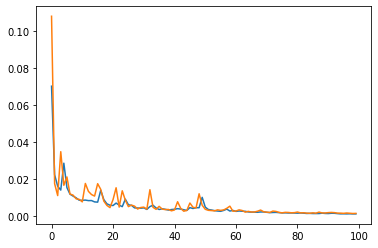

In [27]:

if __name__ == "__main__":
    
    # get train, validation , test splits
    x_train, x_validation, x_test, y_train, y_validation, y_test = prepare_datasets(0.1, 0.1)
    
    print(x_train.shape)
    print(y_train.shape)
    print(x_validation.shape)
    print(y_validation.shape)


    np.save("x_test", x_test)
    np.save("y_test", y_test)

    # create network
    input_shape = (x_train.shape[1], x_train.shape[2])
    
    
    model = build_model(input_shape)

    # compile model
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer,
                  loss='mse',
                  metrics=[metrics.MeanSquaredError()])

    checkpoint_callback = ModelCheckpoint('weights.h5', monitor='val_mean_squared_error', verbose=1,
                                          save_best_only=True, mode='min')

    reducelr_callback = ReduceLROnPlateau(
        monitor='val_mean_squared_error', factor=0.7, patience=7, min_delta=0.0001,
        verbose=1
    )

    callbacks_list = [checkpoint_callback, reducelr_callback]

    model.summary()

    # train model
    history = model.fit(x_train, y_train, validation_data=(x_validation, y_validation), batch_size=32, epochs=100,
                        callbacks=callbacks_list)

    # plot accuracy
    plot_history(history)
